Приклад №1


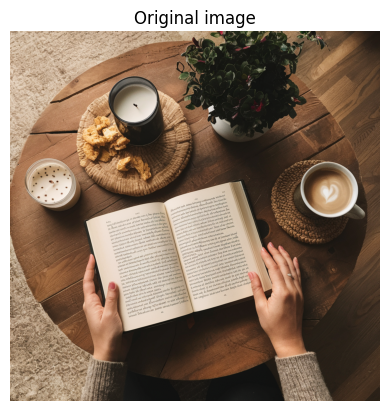

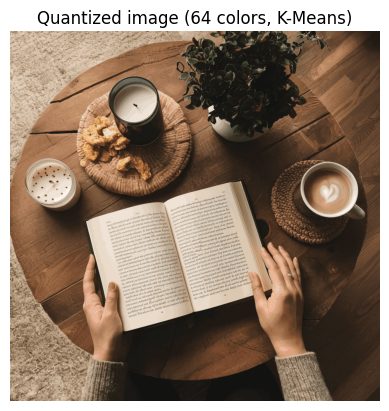



Приклад №2


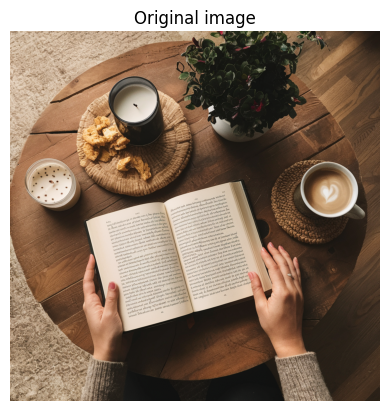

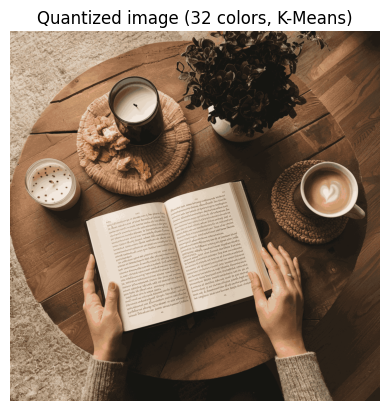



Приклад №3


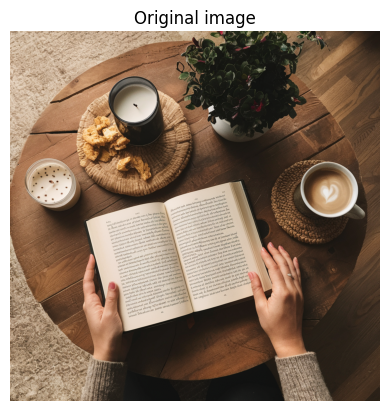

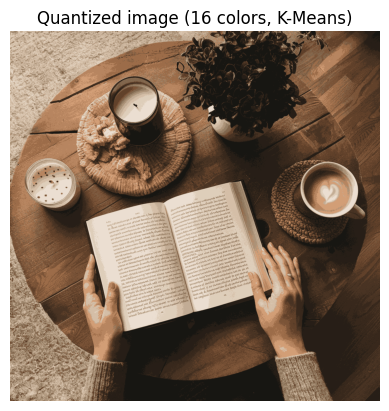



Приклад №4


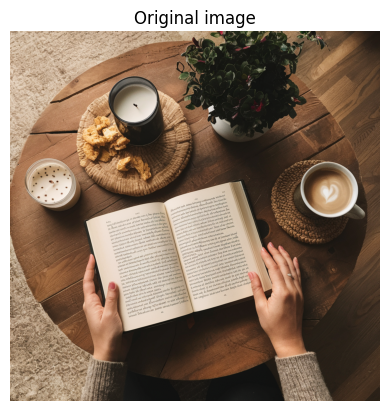

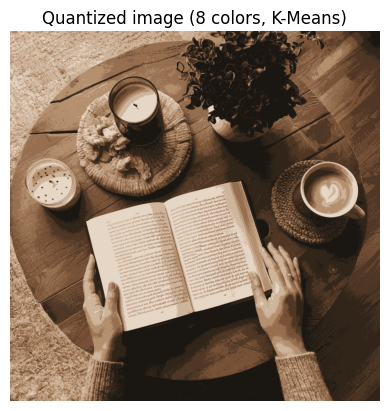

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.utils import shuffle

from PIL import Image

n_colors = [64, 32, 16, 8]

books = Image.open(r"C:\Users\rosti\Downloads\cozy_books.png")

books = np.array(books, dtype=np.float64) / 255

w, h, d = original_shape = tuple(books.shape)
assert d == 3
image_array = np.reshape(books, (w * h, d))

def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)
  
for colour in range(len(n_colors)):
    print(f"Приклад №{colour+1}")
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors[colour], random_state=0).fit(image_array_sample)

    labels = kmeans.predict(image_array)

    plt.figure(1)
    plt.clf()
    plt.axis("off")
    plt.title(f"Original image")
    plt.imshow(books)

    plt.figure(2)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors[colour]} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    plt.show()
  
    print("\n")